In [11]:
# import the necessary packages
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np
import argparse
import imutils
import cv2
import pprint
from matplotlib import pyplot as plt

In [12]:
# load the image

image = cv2.imread("../image-classification-keras/image-classification-keras/examples/santa_02.jpg")
orig = image.copy()

In [13]:
#shape of our picture in array format
print(orig.shape)
#RGB representation of the first pixel in our image
orig[0][0]

(885, 900, 3)


array([255, 255, 255], dtype=uint8)

In [14]:
# pre-process the image for classification
#resize image to fit model shape
image = cv2.resize(image, (28, 28))
image = image.astype("float") / 255.0

In [15]:
print(image.shape)
image = img_to_array(image)
print(image.shape)
image = np.expand_dims(image, axis=0)
print(image.shape)

(28, 28, 3)
(28, 28, 3)
(1, 28, 28, 3)


In [16]:
# load the trained convolutional neural network
# print("[INFO] loading network...")
model = load_model("../image-classification-keras/image-classification-keras/santa_not_santa.model")

# classify the input image
(notSanta, santa) = model.predict(image)[0]

In [17]:
santa

0.9999858

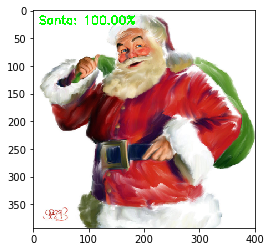

In [18]:
# build the label
label = "Santa" if santa > notSanta else "Not Santa"
proba = santa if santa > notSanta else notSanta
label = "{}: {:.2f}%".format(label, proba * 100)

# draw the label on the image
output = imutils.resize(orig, width=400)
cv2.putText(output, label, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX,0.7, (0, 255, 0), 2)

# show the output image
# cv2.imshow("Output", output)
# cv2.waitKey(0) #need to activate window and press key or program will run forever

#convert OpenCV BGR into RGB
RGB_im = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_im)